In [1173]:
from fairlearn.datasets import fetch_boston
casas = fetch_boston()
print(casas)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

/home/bentocarlos/.local/lib/python3.11/site-packages/fairlearn/datasets/_fetch_boston.py:150: DataFairnessWarning: You are about to use a dataset with known fairness issues.
  warnings.warn(DataFairnessWarning(msg))


In [1174]:
print(casas.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [1175]:
import pandas as pd
total = pd.DataFrame(data=casas['data'], columns=casas.feature_names)
total['PRECO'] = casas['target']
total.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRECO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [1176]:
print(casas.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [1177]:
from sklearn.model_selection import train_test_split
X, y = fetch_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Total de registros com características para treino:", X_train.shape)
print("Total de registros com rótulos para treino:", y_train.shape)
print("Total de registros com características para teste:", X_test.shape)
print("Total de registros com rótulos para teste:", y_test.shape)

Total de registros com características para treino: (354, 13)
Total de registros com rótulos para treino: (354,)
Total de registros com características para teste: (152, 13)
Total de registros com rótulos para teste: (152,)


/home/bentocarlos/.local/lib/python3.11/site-packages/fairlearn/datasets/_fetch_boston.py:150: DataFairnessWarning: You are about to use a dataset with known fairness issues.
  warnings.warn(DataFairnessWarning(msg))


In [1178]:
# X_train.drop(["CRIM", "ZN","INDUS","CHAS","NOX","RM","RAD","TAX","PTRATIO","B","LSTAT"], axis=1, inplace=True)
# X_test.drop( ["CRIM", "ZN","INDUS","CHAS","NOX","RM","RAD","TAX","PTRATIO","B","LSTAT"], axis=1, inplace=True)
# X_train.drop(["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"], axis=1, inplace=True)
# X_test.drop( ["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"], axis=1, inplace=True)

# Dropa todas as colunas, menos 2 para treino

X_train.drop(["CRIM", "ZN","INDUS","CHAS","AGE","TAX","PTRATIO","B","LSTAT"], axis=1, inplace=True)
X_test.drop( ["CRIM", "ZN","INDUS","CHAS","AGE","TAX","PTRATIO","B","LSTAT"], axis=1, inplace=True)



In [1179]:
X_train

,NOX,RM,DIS,RAD
140,0.624,6.174,1.6119,4
259,0.647,6.842,2.0107,5
63,0.453,6.762,7.9809,8
487,0.583,5.905,3.1523,24
273,0.464,7.691,4.3665,3
...,...,...,...,...
292,0.411,6.630,5.1167,4
422,0.614,5.648,1.9512,24
249,0.431,6.718,7.8265,7
368,0.631,4.970,1.3325,24


In [1180]:
X_test

,NOX,RM,DIS,RAD
400,0.693,5.987,1.5888,24
60,0.453,5.741,7.2254,8
434,0.713,6.208,2.2222,24
241,0.428,6.095,6.3361,6
155,0.871,6.152,1.7455,5
...,...,...,...,...
196,0.404,7.287,7.3090,2
171,0.605,5.880,2.3887,5
100,0.520,6.727,2.7778,5
370,0.631,7.016,1.2024,24


In [1181]:
X_test = X_test.astype('float')

In [1182]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
predicao = modelo.predict(X_test)

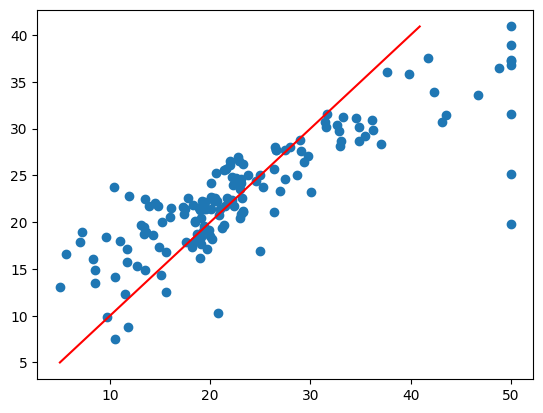

In [1183]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, predicao)
range = [y_test.min(), predicao.max()]
plt.plot(range, range, 'red')
plt.show()

In [1184]:
# Avaliando os resultados do treino
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicao)
print("Performance do treinamento")
print("R quadrado: {}".format(r2))

Performance do treinamento
R quadrado: 0.646003967451005


In [1185]:
teste = [[10, 90]]
predicao = modelo.predict(teste)
print(predicao)

/home/bentocarlos/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 4 features as input.